# MNIST Fashion

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading Mnist Fashion dataset from the Internet

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Train features:",x_train.shape)
print("Train Labels:  ",y_train.shape)
print("Test Features: ",x_test.shape)
print("Test Labels:   ",y_test.shape)
print("Dimention: ",x_train.ndim)
print("Dimention: ",y_train.ndim)
print("Dimention: ",x_test.ndim)
print("Dimention: ",y_test.ndim)

Train features: (60000, 28, 28)
Train Labels:   (60000,)
Test Features:  (10000, 28, 28)
Test Labels:    (10000,)
Dimention:  3
Dimention:  1
Dimention:  3
Dimention:  1


In [4]:
class_names = ["0.T-shirt/top","1.Trouser","2.Pullover","3.Dress","4.Coat","5.Sandal","6.Shirt","7.Sneaker","8.Bag","9.Ankle boot"]
display(class_names)

['0.T-shirt/top',
 '1.Trouser',
 '2.Pullover',
 '3.Dress',
 '4.Coat',
 '5.Sandal',
 '6.Shirt',
 '7.Sneaker',
 '8.Bag',
 '9.Ankle boot']

# Visualizing Data

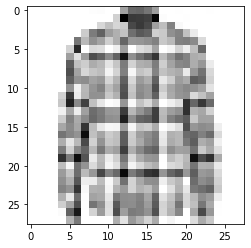

In [5]:
pic  = x_test[7]
plt.imshow(pic,cmap = plt.cm.binary)
plt.show()

In [6]:
# Actual Label
y_test[7]

6

In [7]:
#x_train[0]

# Normalizing Data

Changing Dimension from 3 into 2

As you can see above there are multiple values between 0 to 255 and 255 is Max value so what we're doing is managing the values between 0 and 1 by dividing the train sets by 255.

In [8]:
new_x_train = x_train.reshape(60000, 28 * 28)
new_x_test = x_test.reshape(10000, 28 * 28)
new_x_train, new_x_test = new_x_train/255.0, new_x_test/255.0

In [9]:
#new_x_train[1]

# One hot encoding

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [11]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
print(new_x_train.ndim)
print(new_x_test.ndim)
print("Train features:",new_x_train.shape)
print("Train Labels:  ",y_train.shape)
print("Test Features: ",new_x_test.shape)
print("Test Labels:   ",y_test.shape)

2
2
Train features: (60000, 784)
Train Labels:   (60000, 10)
Test Features:  (10000, 784)
Test Labels:    (10000, 10)


# First Model

In [13]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(512,activation="relu",input_shape=(28 * 28,)),
                layers.Flatten(),
                layers.Dense(64,activation="relu"),
                layers.Dense(16,activation="relu"),
                layers.Dense(10, activation='softmax')])

model.compile(optimizer="adam", # adam # rmsprop
             loss="categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(new_x_train,y_train,epochs=10,validation_split=(0.2))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 186us/sample - loss: 0.5258 - accuracy: 0.8133 - val_loss: 0.4001 - val_accuracy: 0.8581
Epoch 2/10
48000/48000 [==============================] - 8s 158us/sample - loss: 0.3783 - accuracy: 0.8628 - val_loss: 0.4020 - val_accuracy: 0.8528
Epoch 3/10
48000/48000 [==============================] - 8s 170us/sample - loss: 0.3393 - accuracy: 0.8748 - val_loss: 0.3761 - val_accuracy: 0.8681
Epoch 4/10
48000/48000 [==============================] - 8s 170us/sample - loss: 0.3123 - accuracy: 0.8841 - val_loss: 0.3338 - val_accuracy: 0.8797
Epoch 5/10
48000/48000 [==============================] - 8s 157us/sample - loss: 0.2940 - accuracy: 0.8913 - val_loss: 0.3158 - val_accuracy: 0.8845
Epoch 6/10
48000/48000 [==============================] - 7s 144us/sample - loss: 0.2768 - accuracy: 0.8963 - val_loss: 0.3226 - val_accuracy: 0.8875
Epoch 7/10
48000/48000 [==========================

# Evaluation

In [14]:
evaluation = model.evaluate(new_x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

10000/1 - 1s - loss: 0.2371 - accuracy: 0.8826

Loss:  33.76655689954758 %
Accuracy:  88.26000094413757 %


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss

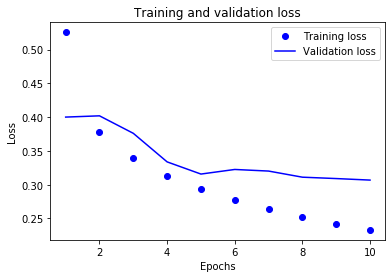

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation Accuracy

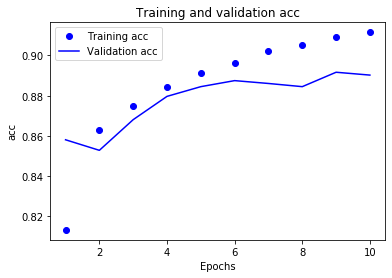

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Predict

Predicted value:  6
Actual value:  6


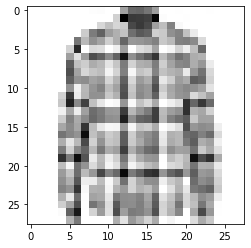

['0.T-shirt/top',
 '1.Trouser',
 '2.Pullover',
 '3.Dress',
 '4.Coat',
 '5.Sandal',
 '6.Shirt',
 '7.Sneaker',
 '8.Bag',
 '9.Ankle boot']

In [18]:
predict = 7
a = model.predict_classes(new_x_test)[predict]
print("Predicted value: ",a)
print("Actual value: ",np.argmax(y_test[predict]))
pic  = x_test[predict]
plt.imshow(pic,cmap = plt.cm.binary)
plt.show()
display(class_names)

# Hyperperameter Tuning

In [19]:
def tunning(epochs,batch_size,drop_ratio):
    
    models = tf.keras.Sequential
    layers = tf.keras.layers

    model1 = models([layers.Dense(512,activation="relu",input_shape=(28 * 28,)),
                layers.Flatten(),
                layers.Dense(64,activation="relu"),
                layers.Dropout(drop_ratio),
                layers.Dense(16,activation="relu"),
                layers.Dense(10, activation='softmax')])

    model1.compile(optimizer="adam", # adam # rmsprop
             loss="categorical_crossentropy",
             metrics=["accuracy"])

    history = model1.fit(new_x_train,y_train,epochs=epochs,batch_size = 128,validation_split=(0.2))
    
    evaluation = model1.evaluate(new_x_test,y_test,verbose=2)
    print()
    print("Loss: ",evaluation[0]*100,"%")
    print("Accuracy: ",evaluation[1]*100,"%")
    #return model1

In [22]:
epochs = 10
batch_size = 256
drop_ratio = 0.001
tunning(epochs,batch_size,drop_ratio)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 64us/sample - loss: 0.5672 - accuracy: 0.8019 - val_loss: 0.4445 - val_accuracy: 0.8406
Epoch 2/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.3899 - accuracy: 0.8591 - val_loss: 0.3849 - val_accuracy: 0.8627
Epoch 3/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3527 - accuracy: 0.8712 - val_loss: 0.3553 - val_accuracy: 0.8687
Epoch 4/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3171 - accuracy: 0.8846 - val_loss: 0.3393 - val_accuracy: 0.8769
Epoch 5/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.2974 - accuracy: 0.8902 - val_loss: 0.3318 - val_accuracy: 0.8786
Epoch 6/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.2846 - accuracy: 0.8947 - val_loss: 0.3238 - val_accuracy: 0.8838
Epoch 7/10
48000/48000 [==============================] 